# Plots of most systems

_25 August 2021_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

Results of runs starting on 25 August.

In [1]:
import matplotlib.pyplot as plt
from plotting import get_confint_max_widths, plot_averaged_training_charts, plot_comparison, make_axes, show_timestamp_info

In [2]:
common_specs = {
    'rounds':                   ('expect', 150),
    'batch_size':               ('expect', 64),
    'epochs':                   ('expect', 1),
    'ema_coefficient':          ('expect', 1 / 3),
    'save_squared_error':       ('expect', False),
    'send':                     ('expect', 'deltas'),
    'power':                    ('title',  1.0),
    'optimizer_client':         ('expect', 'sgd'),
    'clients':                  ('title',  20),
    'noise':                    ('series', '__all__'),
    'lr_scheduler_client':      ('expect', 'none'),
}
base_analog_specs = common_specs.copy()
base_analog_specs.update({
    'script': 'dynpower.py',
    'power_update_period':      ('expect', 1),
    'power_factor':             ('expect', 0.9),
    'power_quantile':           ('expect', 1.0),
    'parameter_radius_initial': ('expect', 1.0),
})
base_digital_specs = common_specs.copy()
base_digital_specs.update({
    'script': 'dynquant.py',
    'qrange_update_period':     ('expect', 1),
    'qrange_client_quantile':   ('expect', 1.0),
    'qrange_initial':           ('expect', 1.0),
    'channel_uses':             ('expect', None),
    'rounding_method':          ('expect', 'stochastic'),
    'parameter_schedule':       ('expect', 'staggered'),
    'zero_bits_strategy':       ('expect', 'read-zero'),
})

# epsilon, $n = 5$

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **25 Aug 2021, 04:25:15** | 25 Aug 2021, 04:30:25 | 5 min 10 s |
| last to finish | 26 Aug 2021, 05:05:54 | **26 Aug 2021, 05:11:03** | 5 min 09 s |
| shortest | 25 Aug 2021, 09:22:04 | 25 Aug 2021, 09:27:06 | **5 min 01 s** |
| longest | 25 Aug 2021, 23:03:51 | 25 Aug 2021, 23:19:31 | **15 min 40 s** |


- Skipping 75 runs that don't match on 1 keys: clients (75)
- Skipping 75 runs that don't match on 1 keys: clients (75)


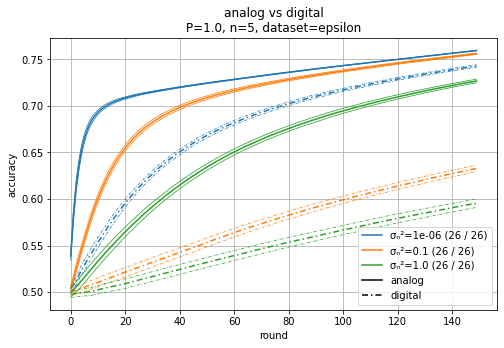

In [3]:
paths = [
    "results/20210825a-epsilon-1",
    "results/20210825a-epsilon-2",
]
epsilon_specs = {
    'dataset':                ('title',  'epsilon'),
    'lr_client':              ('expect', 0.01),
    'momentum_client':        ('expect', 0.0),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', 20000),
    'clients':                ('title',  5),
}

analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(epsilon_specs)
digital_specs.update(epsilon_specs)
digital_specs['qrange_param_quantile'] = ('expect', 1.0)

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['confints'])

In [4]:
get_confint_max_widths('accuracy', paths, analog_specs)

σₙ²=1e-06    0.006426
σₙ²=0.1      0.004653
σₙ²=1.0      0.006087
dtype: float64

In [5]:
get_confint_max_widths('accuracy', paths, digital_specs)

σₙ²=1e-06    0.005667
σₙ²=0.1      0.005137
σₙ²=1.0      0.005388
dtype: float64

# epsilon, $n = 20$

- Skipping 78 runs that don't match on 1 keys: clients (78)
- Skipping 78 runs that don't match on 1 keys: clients (78)


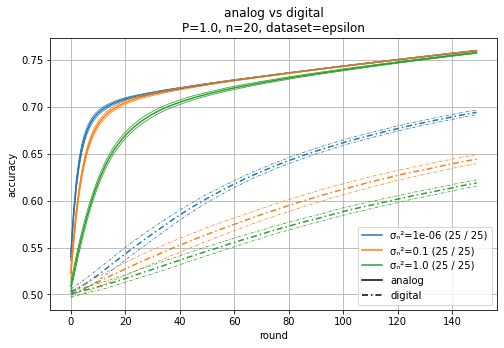

In [6]:
analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
epsilon_specs['clients'] = ('title', 20)
analog_specs.update(epsilon_specs)
digital_specs.update(epsilon_specs)
digital_specs['qrange_param_quantile'] = ('expect', 1.0)

plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['confints'])

In [7]:
get_confint_max_widths('accuracy', paths, analog_specs)

σₙ²=1e-06    0.005107
σₙ²=0.1      0.006073
σₙ²=1.0      0.005461
dtype: float64

In [8]:
get_confint_max_widths('accuracy', paths, digital_specs)

σₙ²=1e-06    0.006712
σₙ²=0.1      0.007459
σₙ²=1.0      0.004875
dtype: float64

# Fashion-MNIST CNN2

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **24 Aug 2021, 21:40:00** | 24 Aug 2021, 22:23:18 | 43 min 17 s |
| last to finish | 25 Aug 2021, 21:37:14 | **25 Aug 2021, 22:09:17** | 32 min 02 s |
| shortest | 25 Aug 2021, 14:28:41 | 25 Aug 2021, 14:58:06 | **29 min 24 s** |
| longest | 25 Aug 2021, 03:39:01 | 25 Aug 2021, 04:35:29 | **56 min 27 s** |


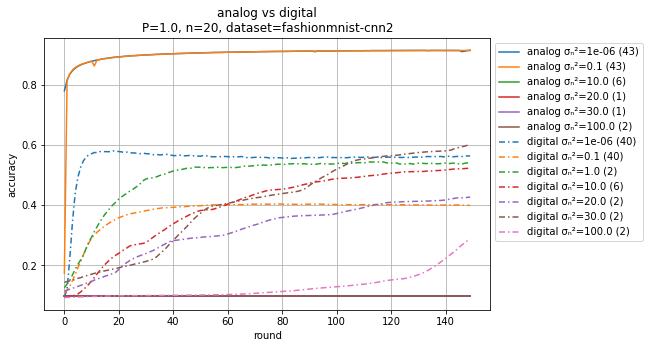

In [9]:
paths = [
    "results/20210825a-fashionmnist-cnn2",
]
fmnist_cnn2_specs = {
    'dataset':                ('title',  'fashionmnist-cnn2'),
    'momentum_client':        ('expect', 0.0),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', None),
    'clients':                ('title',  20),
}

analog_specs = base_analog_specs.copy()
analog_specs.update(fmnist_cnn2_specs)
analog_specs['lr_client'] = ('expect', 0.05)

digital_specs = base_digital_specs.copy()
digital_specs.update(fmnist_cnn2_specs)
digital_specs['lr_client'] = ('expect', 0.01)
digital_specs['qrange_param_quantile'] = ('expect', 0.99)

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

- Skipping 10 runs that don't match on 1 keys: noise (10)
- Skipping 14 runs that don't match on 1 keys: noise (14)


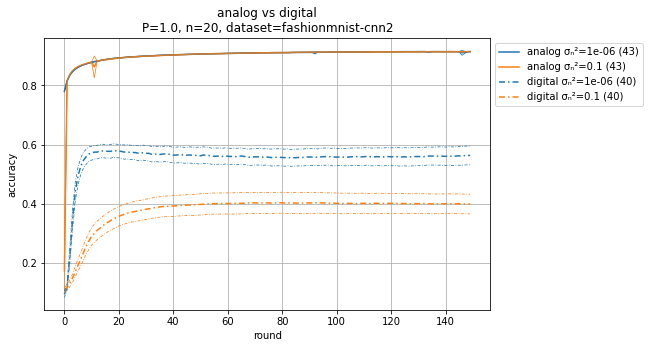

In [10]:
analog_specs['noise'] = digital_specs['noise'] = ('series', [1e-6, 1e-1])
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['confints'])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

In [11]:
get_confint_max_widths('accuracy', paths, analog_specs)

σₙ²=1e-06    0.008297
σₙ²=0.1      0.064002
dtype: float64

In [12]:
get_confint_max_widths('accuracy', paths, digital_specs)

σₙ²=1e-06    0.031812
σₙ²=0.1      0.035990
dtype: float64

Special crazy plot:

- Skipping 5 runs that don't match on 2 keys: noise (5), parameter_radius_initial (3)


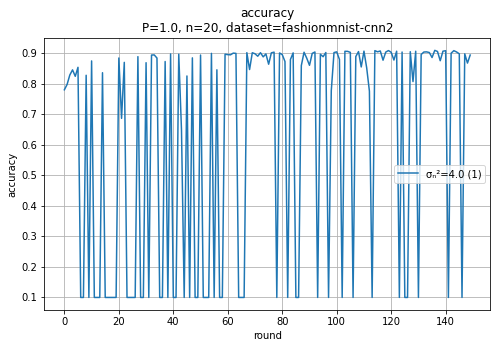

In [13]:
paths = [
    "results/20210824-fashionmnist-cnn2-hinoise",
]
analog_specs = base_analog_specs.copy()
analog_specs.update(fmnist_cnn2_specs)
analog_specs.update({
    'lr_client':                ('filter', 0.05),
    'parameter_radius_initial': ('filter', 0.001, {'missing-action': 'skip'}),
    'noise':                    ('series', 4),
})
plot_averaged_training_charts(paths, ['accuracy'], analog_specs)

# CIFAR-10 simple

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **25 Aug 2021, 05:09:27** | 25 Aug 2021, 05:54:35 | 45 min 07 s |
| last to finish | 26 Aug 2021, 04:22:11 | **26 Aug 2021, 05:08:27** | 46 min 15 s |
| shortest | 25 Aug 2021, 11:10:03 | 25 Aug 2021, 11:54:41 | **44 min 38 s** |
| longest | 25 Aug 2021, 08:17:41 | 25 Aug 2021, 09:04:26 | **46 min 44 s** |


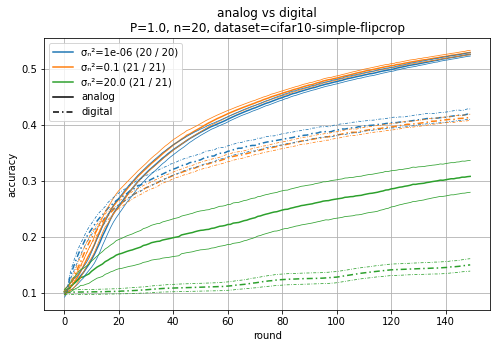

In [14]:
paths = [
    "results/20210825a-cifar10-simple-1",
    "results/20210825a-cifar10-simple-2",
]
cifar10_simple_specs = {
    'dataset':                ('title',  'cifar10-simple-flipcrop'),
    'lr_client':              ('expect', 0.001),
    'momentum_client':        ('expect', 0.9),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', None),
    'clients':                ('title',  20),
}

analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(cifar10_simple_specs)
digital_specs.update(cifar10_simple_specs)
digital_specs['qrange_param_quantile'] = ('expect', 1.0)

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['confints'])

In [15]:
get_confint_max_widths('accuracy', paths, analog_specs)

σₙ²=1e-06    0.017083
σₙ²=0.1      0.014915
σₙ²=20.0     0.036054
dtype: float64

In [16]:
get_confint_max_widths('accuracy', paths, digital_specs)

σₙ²=1e-06    0.011212
σₙ²=0.1      0.009913
σₙ²=20.0     0.011090
dtype: float64

# CIFAR-10 ResNet

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **24 Aug 2021, 21:49:21** | 24 Aug 2021, 22:58:31 | 1 h 09 min 10 s |
| last to finish | 25 Aug 2021, 20:54:10 | **25 Aug 2021, 22:03:24** | 1 h 09 min 13 s |
| shortest | 25 Aug 2021, 15:13:55 | 25 Aug 2021, 16:20:34 | **1 h 06 min 38 s** |
| longest | 25 Aug 2021, 09:18:34 | 25 Aug 2021, 10:31:31 | **1 h 12 min 57 s** |


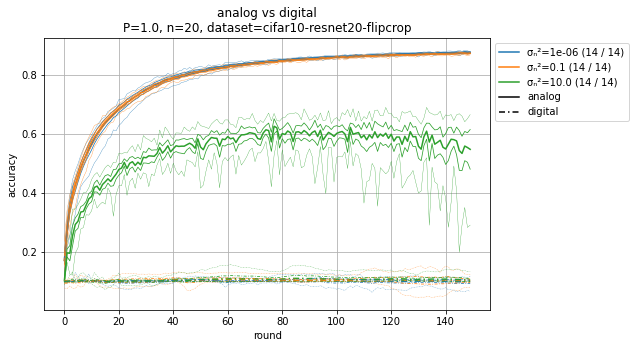

In [17]:
paths = [
    "results/20210825a-cifar10-resnet20",
]
cifar10_simple_specs = {
    'dataset':                ('title',  'cifar10-resnet20-flipcrop'),
    'lr_client':              ('expect', 0.1),
    'momentum_client':        ('expect', 0.9),
    'weight_decay_client':    ('expect', 1e-4),
    'data_per_client':        ('expect', None),
    'clients':                ('title',  20),
    'batch_size':             ('expect', 128),
}
analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(cifar10_simple_specs)
digital_specs.update(cifar10_simple_specs)
digital_specs['qrange_client_quantile'] = ('expect', 0.9)
digital_specs['qrange_param_quantile'] = ('expect', 0.9)

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=[('range', 1/5), 'confints'])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

In [18]:
get_confint_max_widths('accuracy', paths, analog_specs)

σₙ²=1e-06    0.022017
σₙ²=0.1      0.024898
σₙ²=10.0     0.067514
dtype: float64

In [19]:
get_confint_max_widths('accuracy', paths, digital_specs)

σₙ²=1e-06    0.007313
σₙ²=0.1      0.012510
σₙ²=10.0     0.010473
dtype: float64